# 線性回歸 (Linear Regression)

![Aaron Swartz](https://www.superheuristics.com/wp-content/uploads/2018/10/Equation-of-Linear-Regression.png)

* 使用Kaggle中的A Collection of Patients BMI Data 資料集:
https://www.kaggle.com/freego1/bmi-data

  * 此數據集具有25,000個患者，為csv副檔名的檔案
  * 輸入特徵為性別、年齡(年)、身高(英吋)與體重(磅)
  * 輸出特徵為BMI(公斤/公尺平方)
  * 缺失值數量：身高為19，體重為16，BMI缺失值為50


## 資料讀取
* google.colab 中的 files.upload() 讀取本機檔案
* pandas 中的 [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 讀取.csv檔案
* pandas 中的 [DataFrame.head(x)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) 讀取DataFrame前x列，x預設為5
* pandas 中的 [DataFrame.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) 讀取每一欄位的型別
* pandas 中的 [DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) 可針對欄位條件篩選來做修改

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bmi_data.csv to bmi_data.csv


In [0]:
import pandas as pd
rawdata = pd.read_csv('bmi_data.csv')
rawdata.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669


In [0]:
rawdata.dtypes

Sex                object
Age                 int64
Height(Inches)    float64
Weight(Pounds)    float64
BMI               float64
dtype: object

In [0]:
rawdata.loc[rawdata['Sex']=='Male','Sex']=0
rawdata.loc[rawdata['Sex']=='Female','Sex']=1

## **搜索/整理空缺數值**
* pandas 中的 [DataFrame.fillna(0)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) 可以把0填補至缺失值
* pandas 中的 [DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) 返回一個無缺失值的dataframe
* pandas 中的 [DataFrame.isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html).any() 可以返回有缺失值的欄位名稱
* pandas 中的 [DataFrame.to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) 可以將DataFrame返回為陣列
* pandas 中的 [DataFrame.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) 可以返回欄位名稱

In [0]:
rawdata.isnull().any()

Sex               False
Age               False
Height(Inches)     True
Weight(Pounds)     True
BMI                True
dtype: bool

In [0]:
print("在rawdata中，有缺失值的數量：%s" %(len(rawdata[rawdata.isnull().values==True])))
print("在rawdata中，無缺失值的列數量：%s" %(len(rawdata.dropna())))

在rawdata中，有缺失值的數量：85
在rawdata中，無缺失值的列數量：24950


In [0]:
nondata = rawdata.dropna()
datanames = nondata.columns
print("資料欄位名稱" ,datanames)

data = nondata.to_numpy()
print("資料維度：", data.shape)

資料欄位名稱 Index(['Sex', 'Age', 'Height(Inches)', 'Weight(Pounds)', 'BMI'], dtype='object')
資料維度： (24950, 5)


## 提取輸入特徵與標籤
* numpy中的 [numpy.delete()](https://numpy.org/doc/1.18/reference/generated/numpy.delete.html) 可以刪除陣列的行或列

In [0]:
import numpy as np

featurenames = datanames[0:4]
print("特徵名稱" ,featurenames)

feature = np.delete(data, 4, axis=1) 
label = data[:,4]

特徵名稱 Index(['Sex', 'Age', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')


## 資料分割為訓練集與測試集
* sklearn中的 [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 可以將資料分割為指定大小的訓練集與測試集

In [0]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(feature, label, random_state = 0, test_size = 0.3)
print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))

訓練集數量 17465
測試集數量 7485


## 建立線性回歸模型
* 模型初始化
* sklearn使用model.fit(x,y)將數據帶入模型進行訓練，其中x, y為訓練集的輸入(特徵)與輸出(標籤)
* sklearn使用model.predict() 將數據帶入模型進行預測，並返回預測值
* matplotlib使用plt.scatter() 畫出散布圖
* sklearn使用model.coef_ 回傳模型的權重
* sklearn使用model.intercept_ 回傳模型的偏差
* sklearn使用mean_squared_error() 計算MSE指標
* sklearn使用r2_score() 計算決定係數(Coefficient of determination)


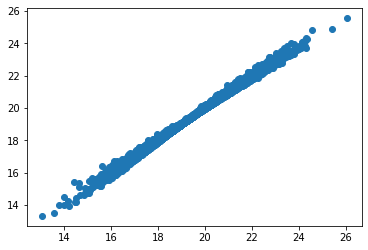

模型權重(係數): [ 1.90361064e-03 -2.77206101e-05 -5.69367622e-01  1.52489302e-01]
模型偏差(截距): 38.65585843784948
Mean squared error: 0.00756
Coefficient of determination: 0.99686


In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(train_x, train_y)
test_predict = LR.predict(test_x)

import matplotlib.pyplot as plt
plt.scatter(test_y, test_predict)
plt.show()

print("模型權重(係數):", LR.coef_)
print("模型偏差(截距):", LR.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.5f' % mean_squared_error(test_y, test_predict))
print('Coefficient of determination: %.5f' % r2_score(test_y, test_predict))

## 繪出模型的權重重要性圖

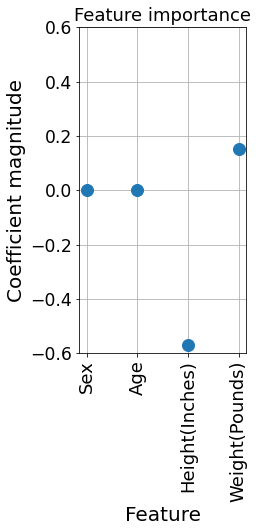

In [0]:
plt.figure(figsize=(3, 6))
plt.title('Feature importance',size =18)
plt.plot(LR.coef_.T,'o',markersize=12)  
plt.xticks(range(len(featurenames)), featurenames , rotation=90, size =18 )
plt.yticks(rotation=0,size ='xx-large' )
plt.ylim(-0.6, 0.6) 
plt.grid()
plt.xlabel("Feature",size =20)
plt.ylabel("Coefficient magnitude",size =20)
plt.show()

## 儲存與讀取模型

In [37]:
from sklearn.externals import joblib 

#儲存Model
joblib.dump(LR, 'Linear_Regression_BMI.pkl')

#讀取Model
LR = joblib.load('Linear_Regression_BMI.pkl')

#測試Model
# 1英吋 = 0.0254  公尺, 75英吋 = 1.905 公尺
# 1磅 = 0.45359237 公斤, 153磅 = 69.39963261 公斤

test = np.array([[0, 40, 75, 153]])
predict = LR.predict(test)
print("預測BMI為：%.5f" %(predict[0]))
BMI = (test[0][3]*0.45359237)/((test[0][2]*0.0254)**2)
print("實際BMI為：%.5f" %(BMI))


預測BMI為：19.28304
實際BMI為：19.12349
